In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df=pd.read_csv("heart.csv")

## Displaying the First 5 fows of the data set

In [3]:

df.head()

Age  Sex  CP  Trestbps  Chol  Fbs  Restecg  Thalach  Exang  Oldpeak  Slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   Ca  Thal  Predicted_Atrb  
0   2     3               0  
1   0     3               0  
2   0     3               0  
3   1     3               0  
4   3     2               0

In [4]:
df.tail()

Age  Sex  CP  Trestbps  Chol  Fbs  Restecg  Thalach  Exang  Oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      Slope  Ca  Thal  Predicted_Atrb  
1020      2   0     2               1  
1021      1   1     3               0  
1022      1   1     2               0  
1023      2   0     2               1  
1024      1   1     3               0

### Short Description of the data-Set

####  The above heart disease dataset is taken from the UCI website and it contains 14 attributes below are the details.
**Age** : This collumn contains the Age of the patient<br>
**Sex** :This collumn tell about the male and female (1 = male; 0 = female)<br>
**CP**:This contains the ifo about chest pain type (1: typical angina,2: atypical angina,3: non-anginal pain,4: asymptomatic)<br>
**Trestbps**: This collumn tells about resting blood pressure (in mm Hg on admission to the hospital)<br>
**Chol**:this tell about the serum cholestoral in mg/dl<br>
**Fbs** : It is the info about fasting blood sugar if its greater than 120mg/dl (1=yes, 0=no)<br>
**Restecg**:This is resting electrocardiographic results (0:normal, 1:having ST-T wave abnormality, 2: showing<br> **probable** or definite left ventricular hypertrophy by Estes' criteria)<br>
**Thalach**:This collumn contains the info of the max heart rate achived.<br>
**Exang**: This collum tell about exercise induced angina (1 = yes; 0 = no)<br>
**Oldpeak**: This tell about the ST depression induced by exercise relative to rest<br>
**Slope**: It is the slope of the peak exercise ST segment where (1:upsloping, 2: flat, 3:downsloping)<br>
**Ca**: It contains the no of major vessels (0-3) colored by flourosopy.<br>
**Thal**: This tells about thalassemia where (3 = normal; 6 = fixed defect; 7 = reversable defect)<br>
**Predicted_Atrb**:It is the predictor attribute the predicted attribute ranging from 1 to 4<br>



## Exploring the dataset

In [5]:
# this tells about the no of null in dataset
df.isnull().sum()

Age               0
Sex               0
CP                0
Trestbps          0
Chol              0
Fbs               0
Restecg           0
Thalach           0
Exang             0
Oldpeak           0
Slope             0
Ca                0
Thal              0
Predicted_Atrb    0
dtype: int64

In [6]:
# this tells about the different collums present in the dataset
df.columns

Index(['Age', 'Sex', 'CP', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Predicted_Atrb'],
      dtype='object')

In [7]:
#checking the duplicates
duplicate_data=df.duplicated().any()
duplicate_data

True

In [8]:
# droping the duplicates
#checking the if no duplicates
df=df.drop_duplicates()
df.duplicated().any()

False

In [9]:
#this describe the data set
df.describe()

Age         Sex          CP    Trestbps        Chol         Fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          Restecg     Thalach       Exang     Oldpeak       Slope          Ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.470196    1.161452    0.616274    1.006748   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             Thal  Predicted_Atrb  
count  302.000000      302.000000  
mean     2.314570        0.543046  
std      0.613026        0.498970  
min      0.000000        0.000000  
25%      2.000000        0.000000  
50%      2.000000        1.000000  
75%      3.000000        1.000000  
max      3.000000        1.000000

In [10]:
# This tell about data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             302 non-null    int64  
 1   Sex             302 non-null    int64  
 2   CP              302 non-null    int64  
 3   Trestbps        302 non-null    int64  
 4   Chol            302 non-null    int64  
 5   Fbs             302 non-null    int64  
 6   Restecg         302 non-null    int64  
 7   Thalach         302 non-null    int64  
 8   Exang           302 non-null    int64  
 9   Oldpeak         302 non-null    float64
 10  Slope           302 non-null    int64  
 11  Ca              302 non-null    int64  
 12  Thal            302 non-null    int64  
 13  Predicted_Atrb  302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [11]:
# This tell about the shape of the data i.e no rows and collumn
df.shape

(302, 14)

<AxesSubplot:>

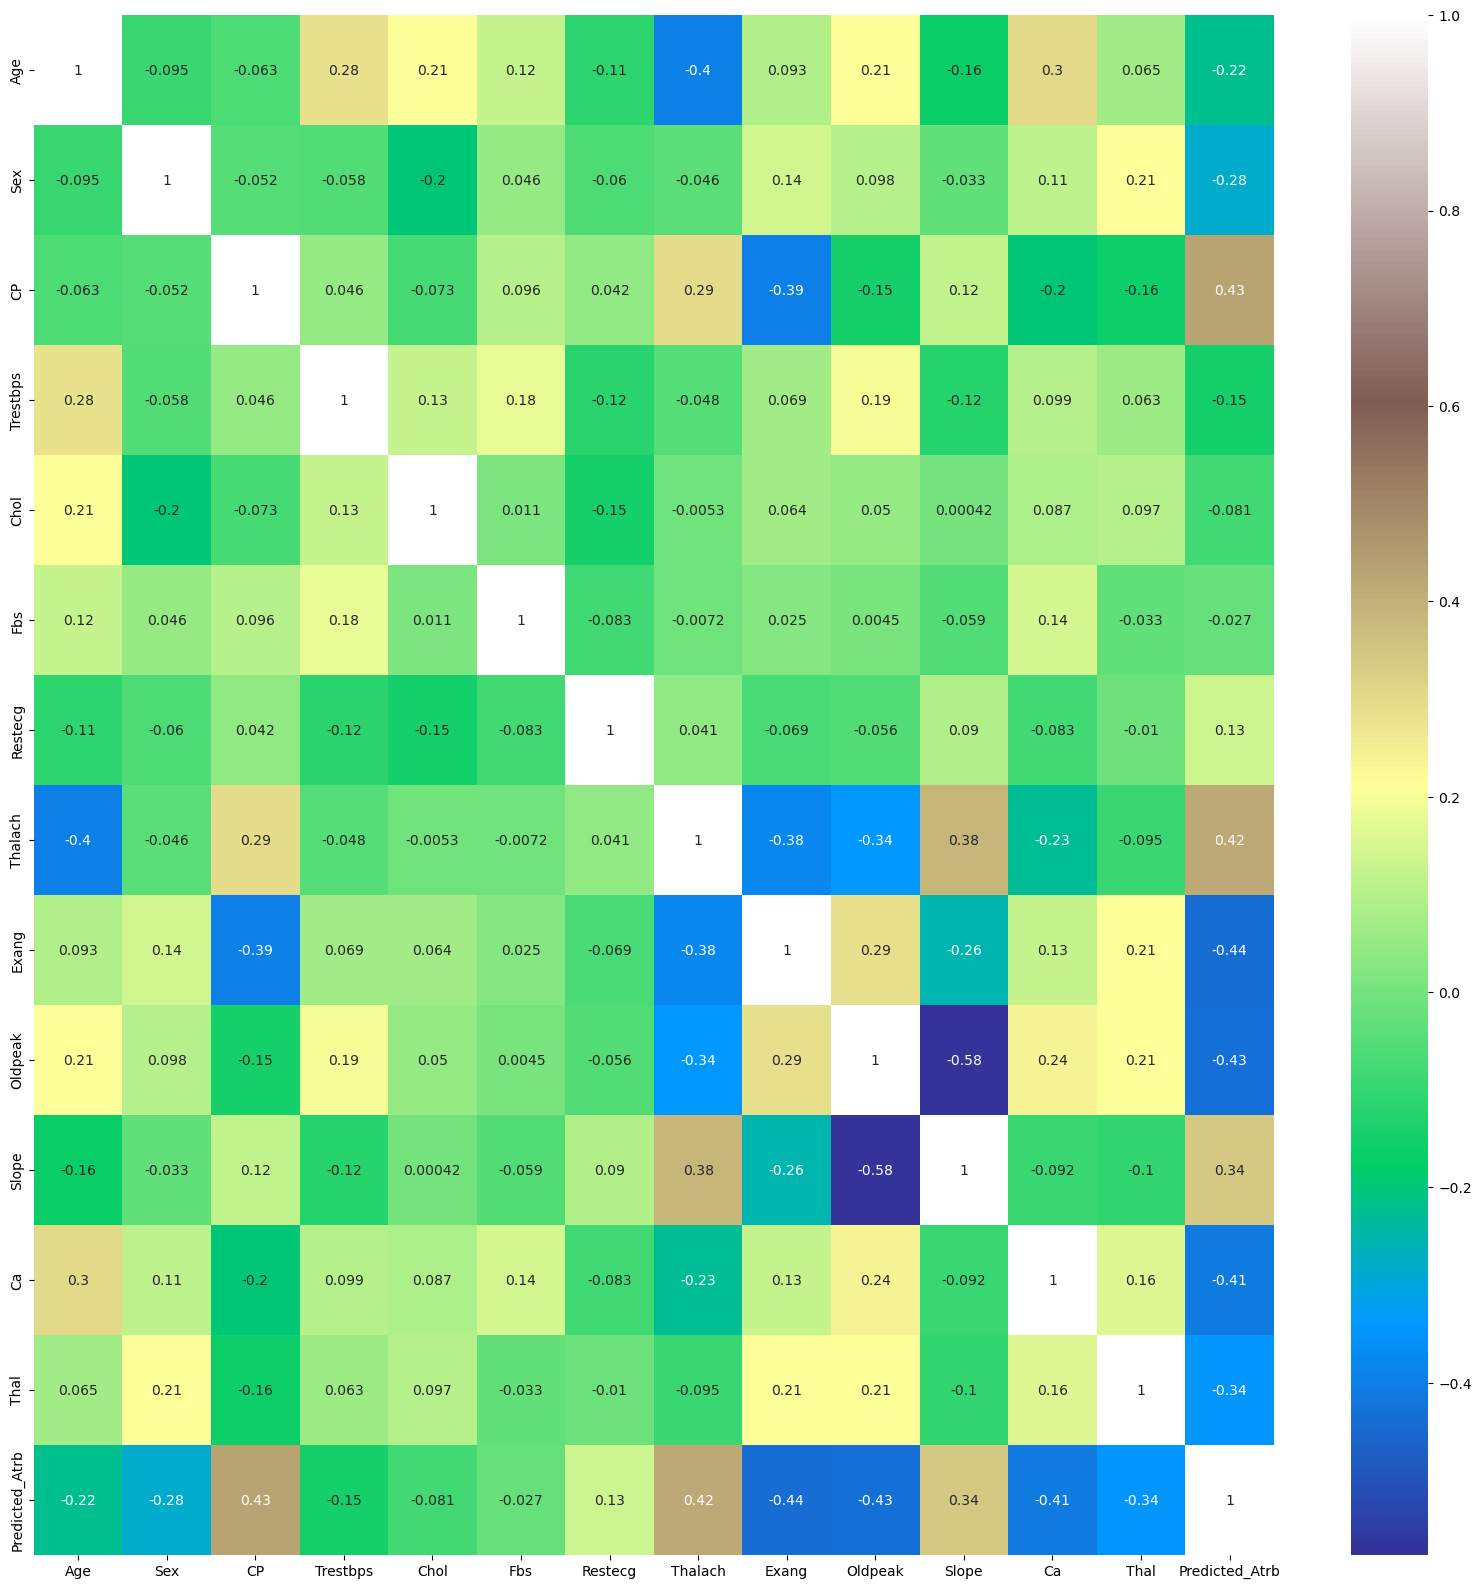

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='terrain')

<p> From above we observe that there is the high correlation between predictor atribute cp,Thalach and oldpeak  </p>

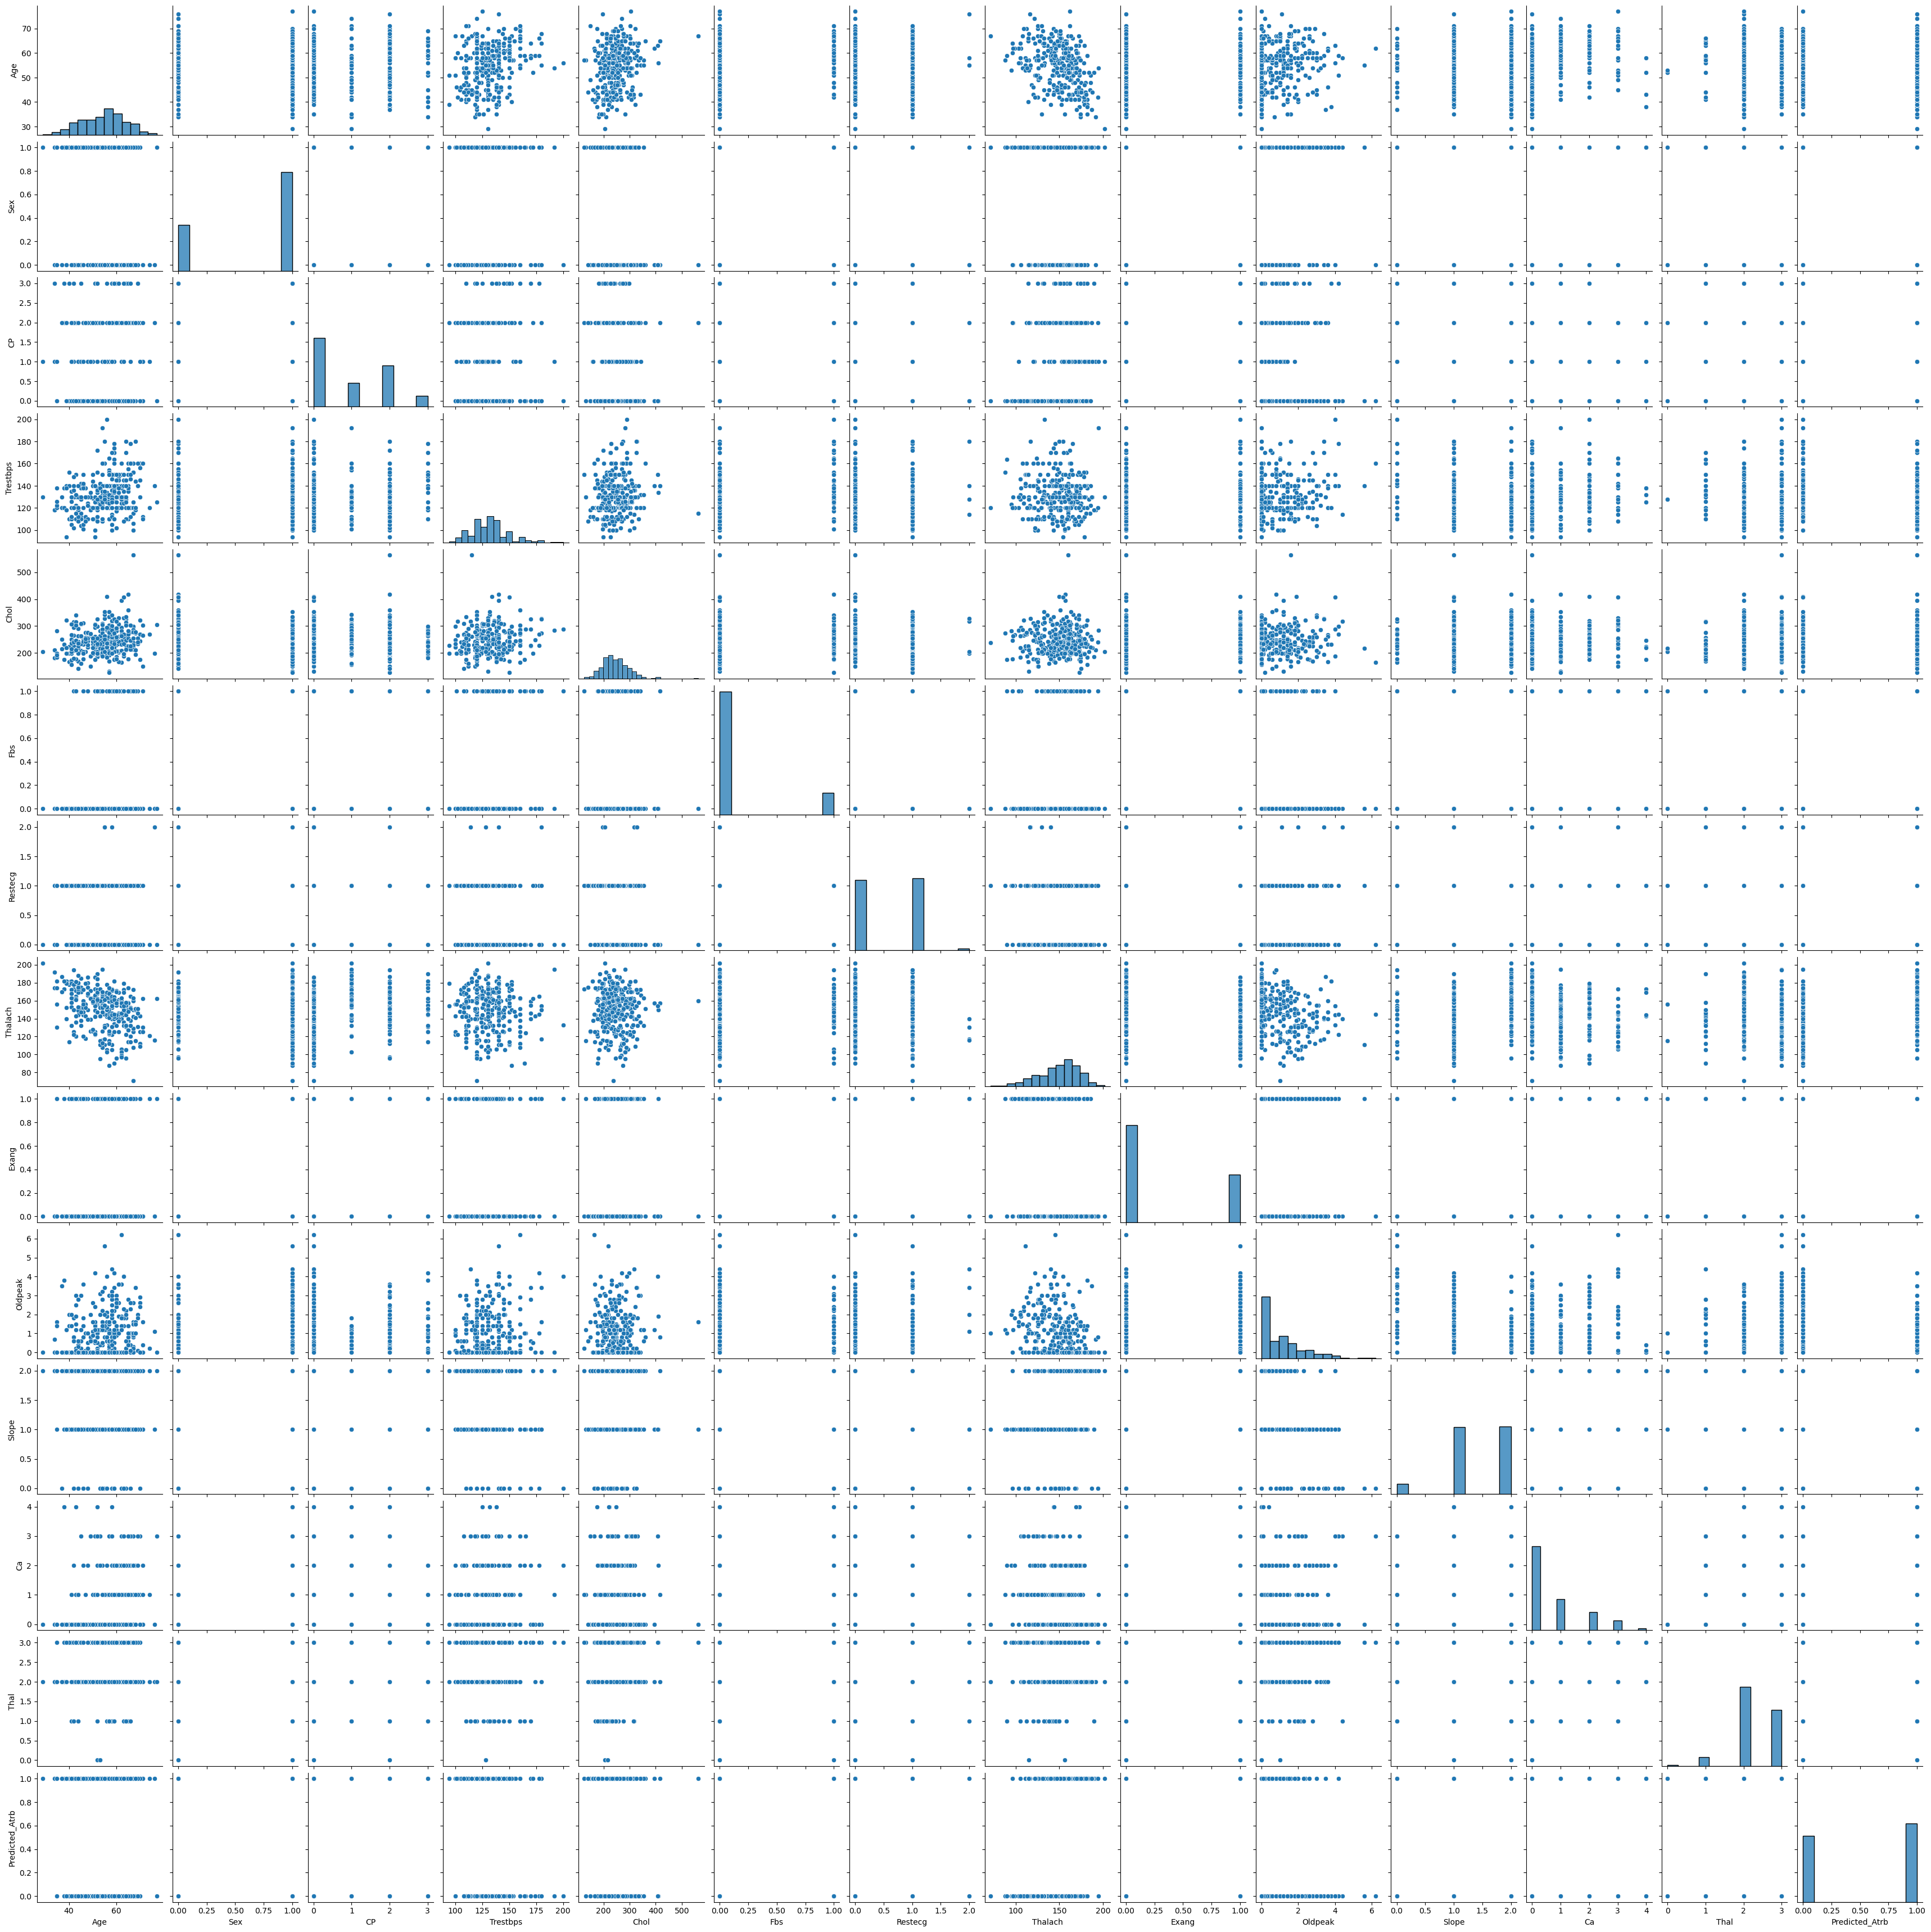

In [13]:
# show the data distribution of two variable
# Intail understanding of the data
sns.pairplot(data=df)

In [14]:
#understanding more about data
df.hist(figsize=(14,14),layout=(6,3))

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'CP'}>],
       [<AxesSubplot:title={'center':'Trestbps'}>,
        <AxesSubplot:title={'center':'Chol'}>,
        <AxesSubplot:title={'center':'Fbs'}>],
       [<AxesSubplot:title={'center':'Restecg'}>,
        <AxesSubplot:title={'center':'Thalach'}>,
        <AxesSubplot:title={'center':'Exang'}>],
       [<AxesSubplot:title={'center':'Oldpeak'}>,
        <AxesSubplot:title={'center':'Slope'}>,
        <AxesSubplot:title={'center':'Ca'}>],
       [<AxesSubplot:title={'center':'Thal'}>,
        <AxesSubplot:title={'center':'Predicted_Atrb'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [15]:
#boxplot
df.plot(kind='box',subplots=True,layout=(6,3),figsize=(14,14))
plt.show()

In [16]:
#checking the diff age and sex and their possibility for having
#heartdisease
sns.catplot(data=df, x='Sex',y='Age',hue='Predicted_Atrb',palette='spring')

In [17]:
#checking the diff age and sex and their possibility for having
#heartdisease
sns.barplot(data=df, x='Sex',y='Chol',hue='Predicted_Atrb')

<AxesSubplot:xlabel='Sex', ylabel='Chol'>

In [18]:
#checking the count 
df['Sex'].value_counts()

1    206
0     96
Name: Sex, dtype: int64

In [19]:
df['Predicted_Atrb'].value_counts()

1    164
0    138
Name: Predicted_Atrb, dtype: int64

In [20]:
sns.countplot(data=df, x='Sex',hue='Predicted_Atrb',palette='spring')

<AxesSubplot:xlabel='Sex', ylabel='count'>

In [21]:
sns.countplot(data=df, x='Predicted_Atrb')

<AxesSubplot:xlabel='Predicted_Atrb', ylabel='count'>

<AxesSubplot:xlabel='Ca', ylabel='count'>

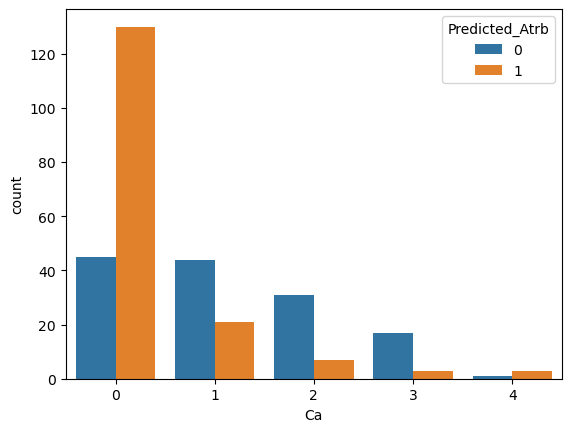

In [22]:
 
sns.countplot(data=df, x='Ca',hue='Predicted_Atrb')

<AxesSubplot:xlabel='Thal', ylabel='count'>

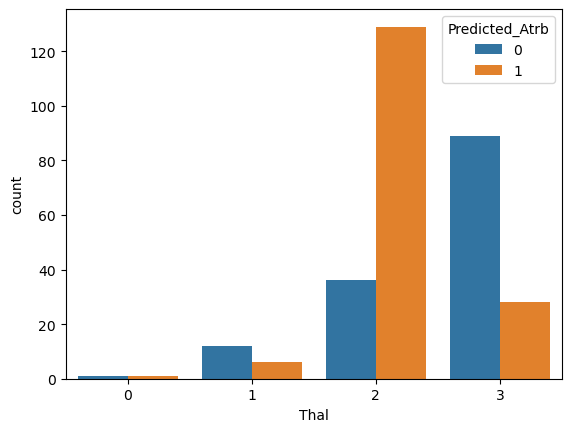

In [23]:
# needs to be checked
sns.countplot(data=df, x='Thal',hue='Predicted_Atrb')

<AxesSubplot:xlabel='CP', ylabel='count'>

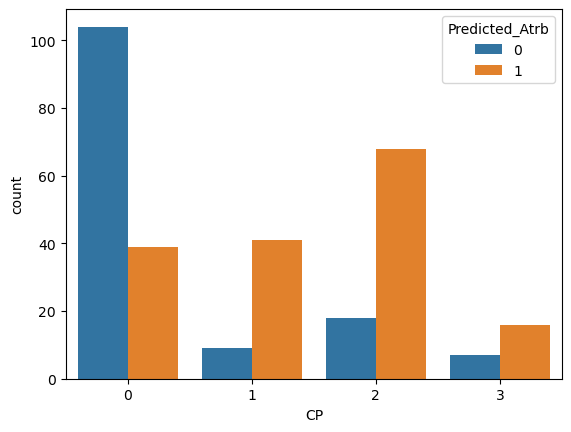

In [24]:
sns.countplot(data=df, x='CP',hue='Predicted_Atrb')

In [25]:
sns.countplot(data=df, x='CP',hue='Sex')

<AxesSubplot:xlabel='CP', ylabel='count'>

<AxesSubplot:xlabel='Sex', ylabel='Chol'>

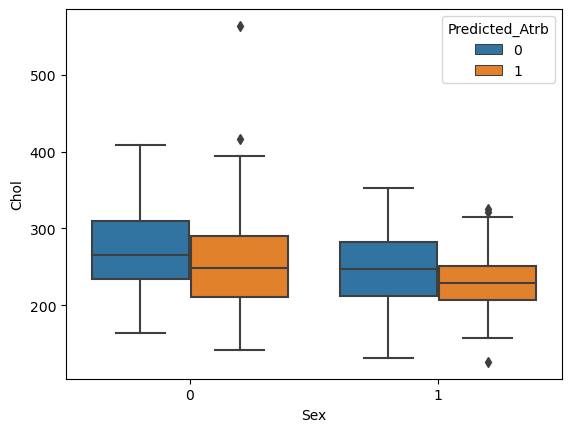

In [26]:
sns.boxplot(data=df, x='Sex',y='Chol',hue='Predicted_Atrb')

<AxesSubplot:xlabel='Predicted_Atrb', ylabel='Ca'>

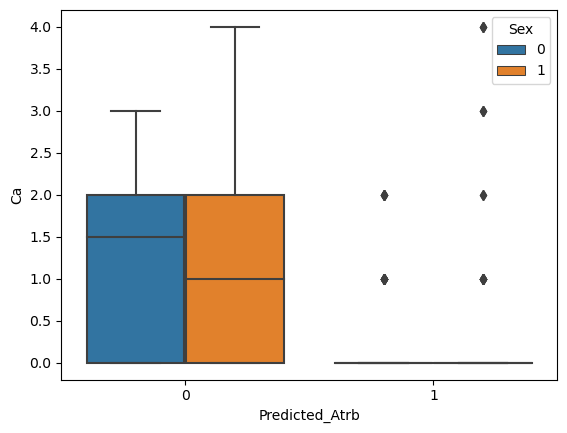

In [27]:
sns.boxplot(data=df, x='Predicted_Atrb',y='Ca',hue='Sex')

<AxesSubplot:xlabel='Sex', ylabel='Oldpeak'>

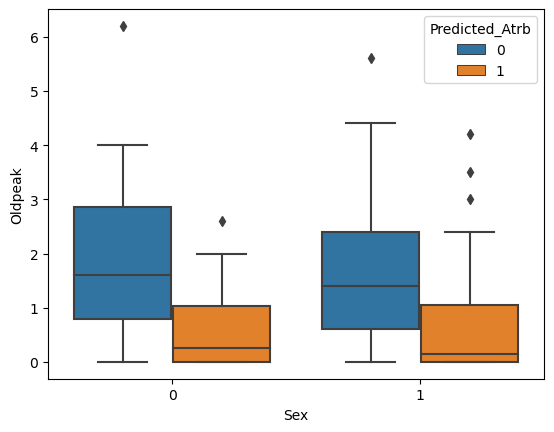

In [28]:
sns.boxplot(data=df, x='Sex',y='Oldpeak',hue='Predicted_Atrb')

<AxesSubplot:xlabel='Fbs', ylabel='Chol'>

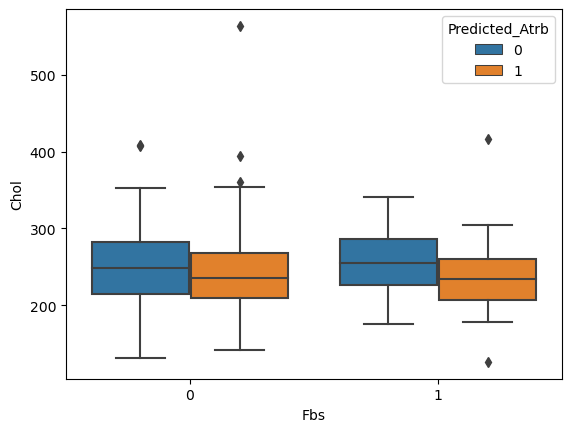

In [29]:
sns.boxplot(data=df, x='Fbs',y='Chol',hue='Predicted_Atrb')

<h3>Cross Table</h3>

In [30]:
output=pd.crosstab(df['Sex'],df['Predicted_Atrb'])
print(output)

Predicted_Atrb    0   1
Sex                    
0                24  72
1               114  92


<AxesSubplot:xlabel='Sex'>

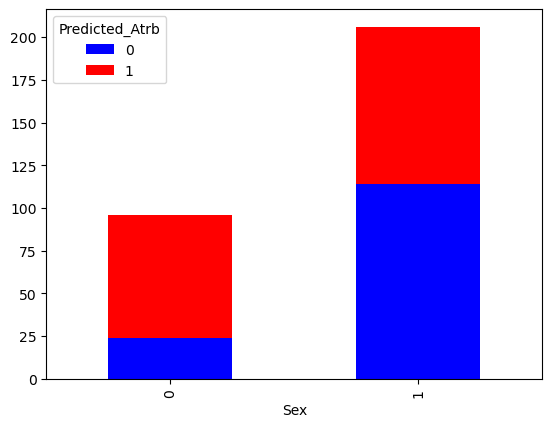

In [31]:
output.plot(kind='bar',stacked=True,color=['blue','red','yellow','green','orange'])

In [32]:
# for chest pain
output_cp=pd.crosstab(df['CP'],df['Predicted_Atrb'])
print(output_cp)

Predicted_Atrb    0   1
CP                     
0               104  39
1                 9  41
2                18  68
3                 7  16


<AxesSubplot:xlabel='CP'>

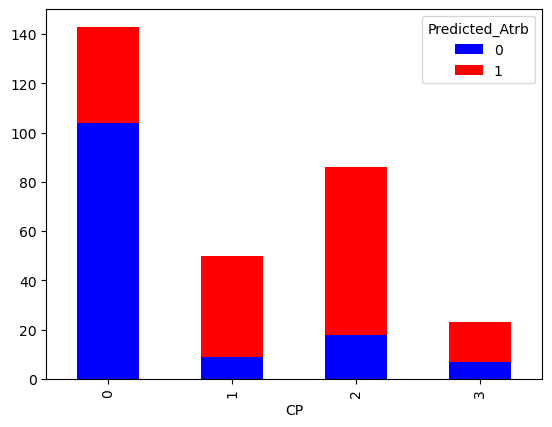

In [33]:
output_cp.plot(kind='bar',stacked=True,color=['blue','red','yellow','green','orange'])

<h2> Hypotheses 1</h2>
<h3> Comparing the diffrent model and their Accuracy Precision Recall for all the variable given in dataset and selecting the best model.</h3>

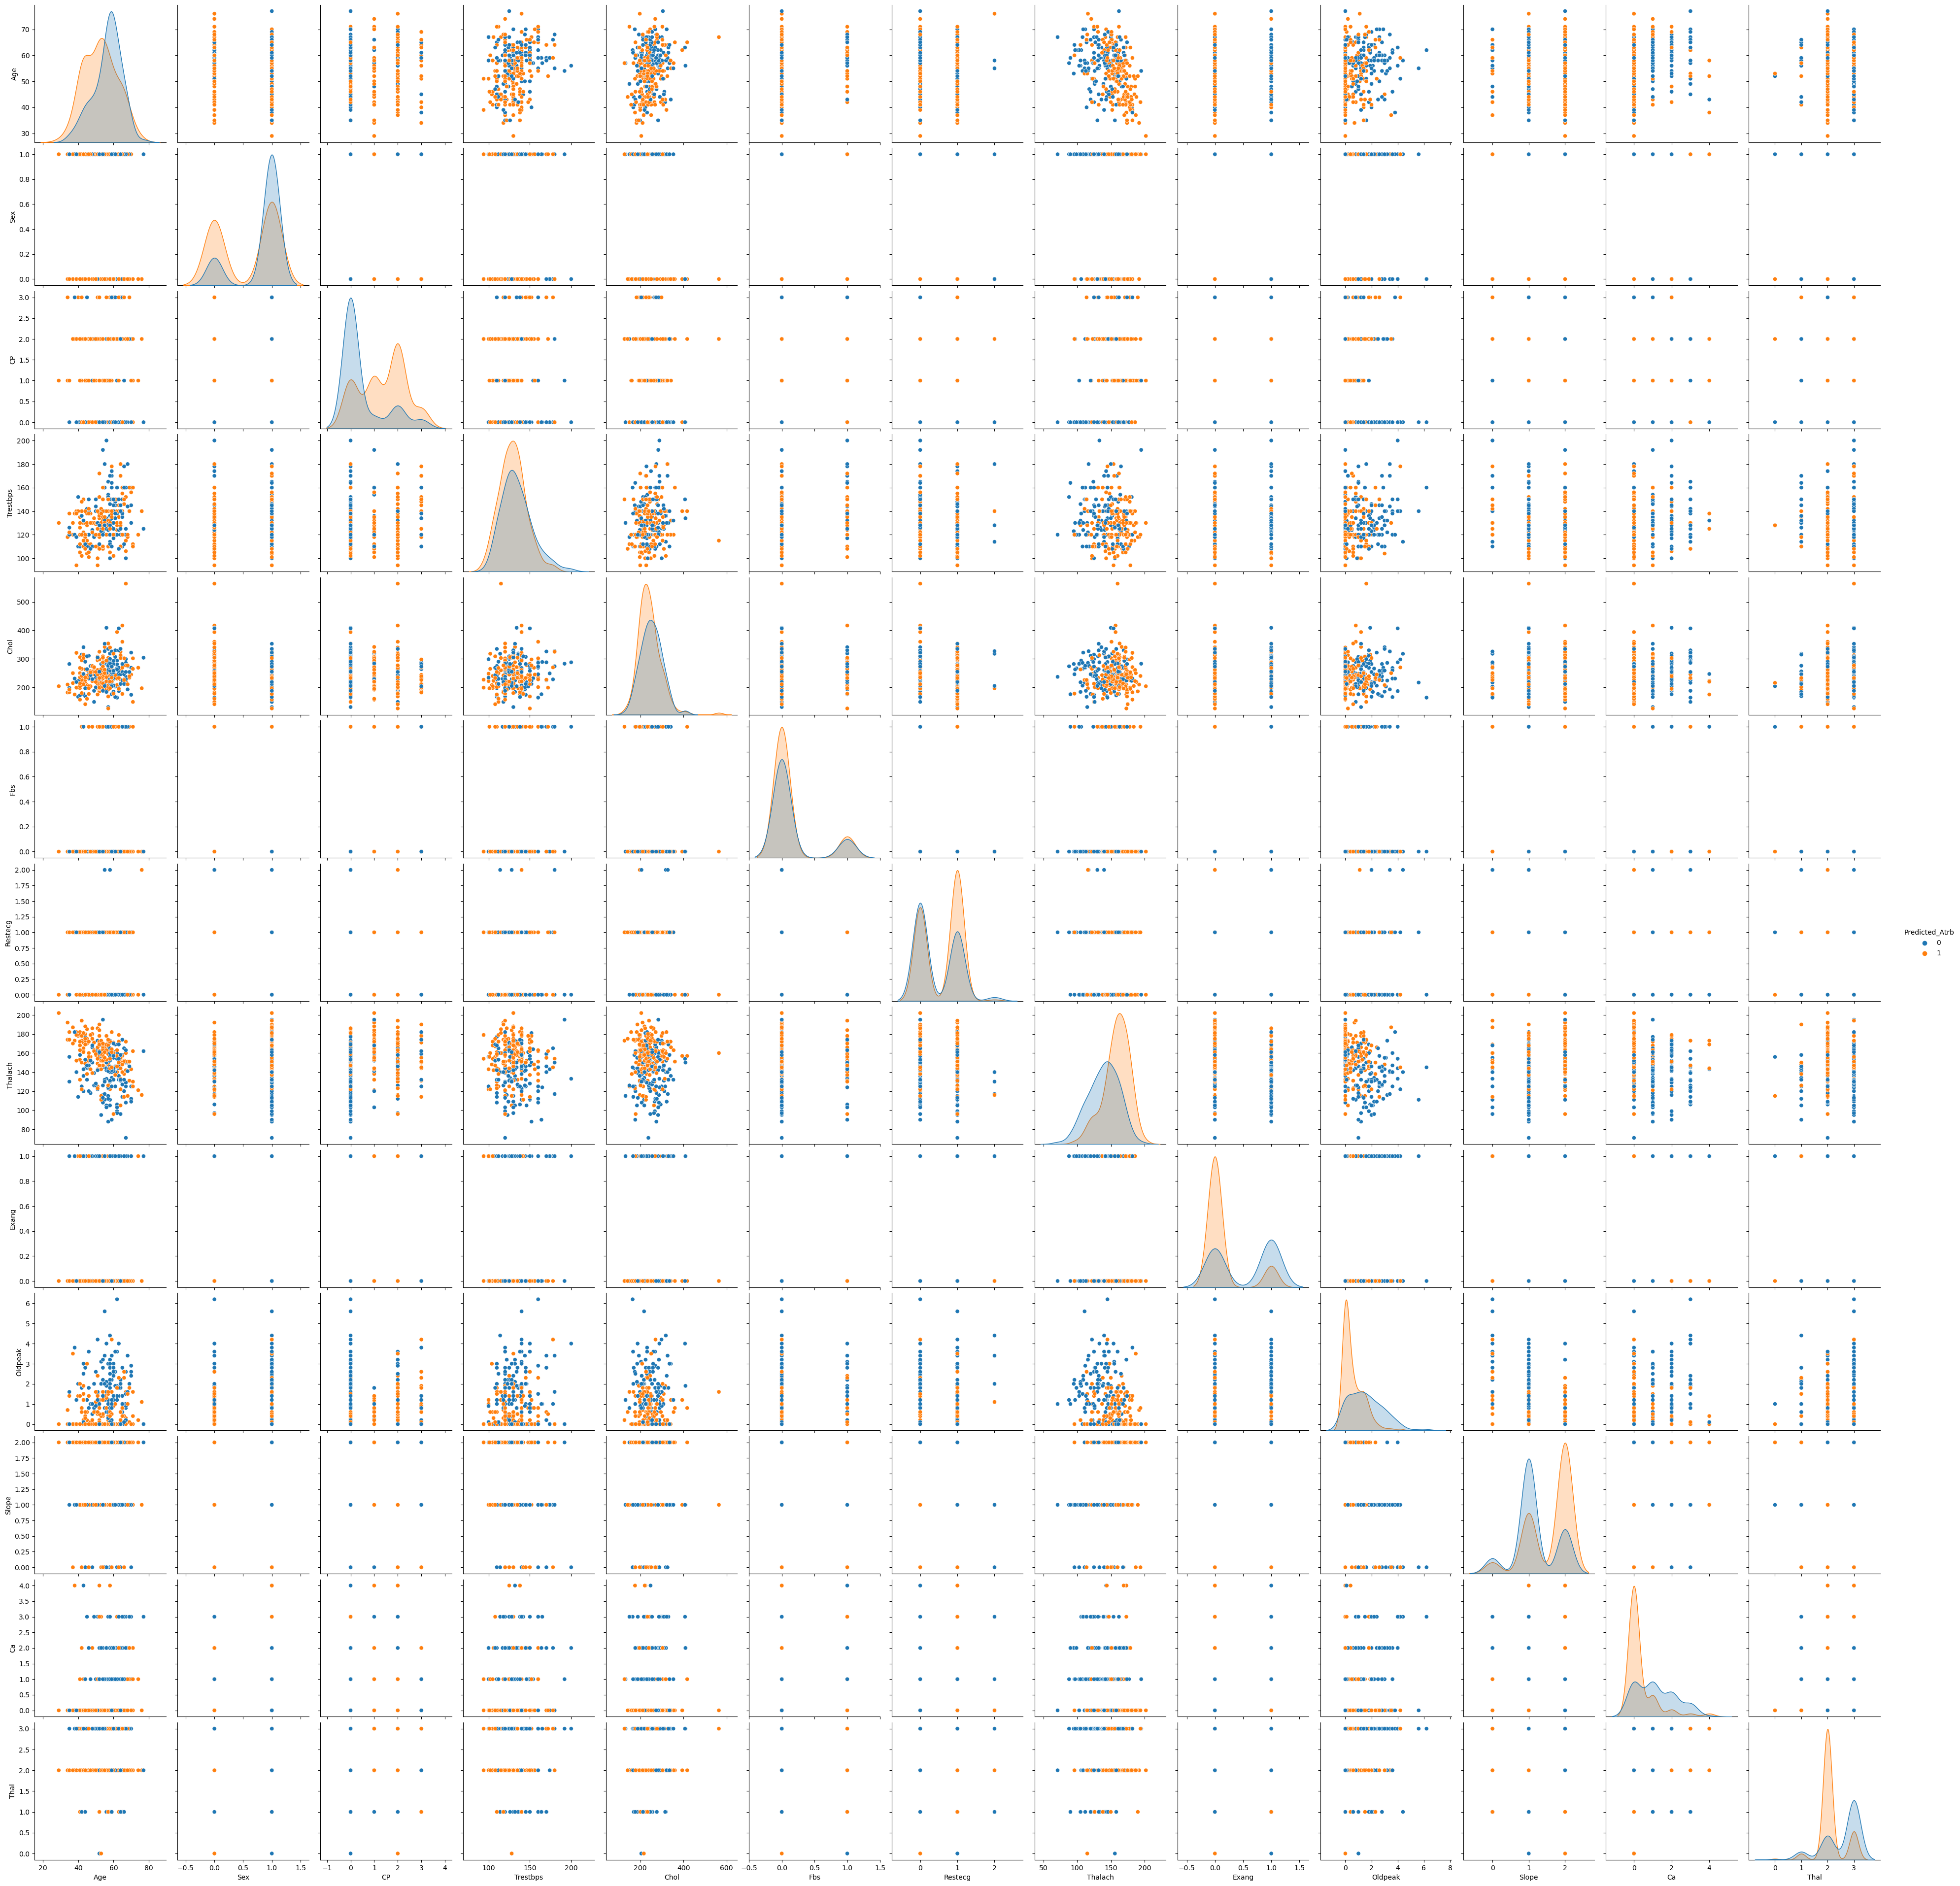

In [34]:
sns.pairplot(df, vars=['Age', 'Sex', 'CP', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal'], hue='Predicted_Atrb', height=3)

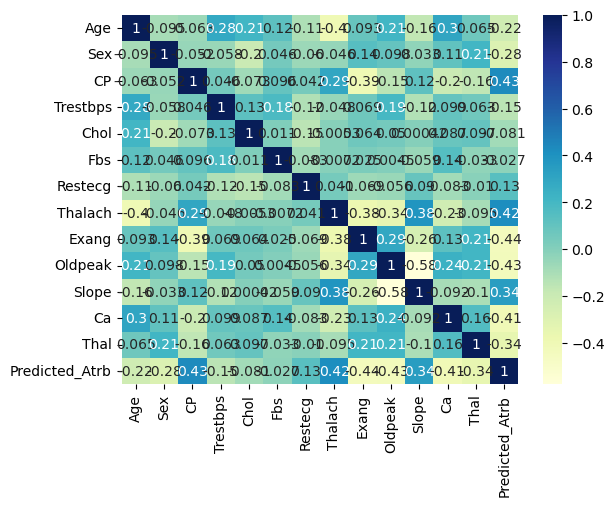

In [35]:
corr_matrix = df[['Age', 'Sex', 'CP', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Predicted_Atrb']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

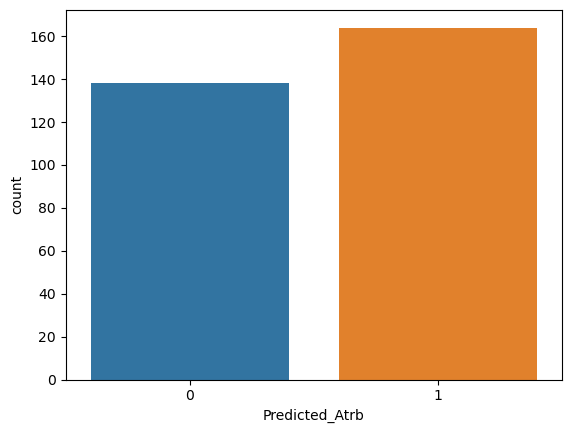

In [36]:
#we can clearly see the data is balance
sns.countplot('Predicted_Atrb', data=df)
plt.show()



<h3>Pre-Processing</h3>

In [37]:
categ_col=[] # categorical column
cnt_val=[] # numerical column
for column in df.columns:
    if df[column].nunique()<=10:
        categ_col.append(column)
    else:
        cnt_val.append(column)

In [38]:
categ_col

['Sex',
 'CP',
 'Fbs',
 'Restecg',
 'Exang',
 'Slope',
 'Ca',
 'Thal',
 'Predicted_Atrb']

In [39]:
cnt_val

['Age', 'Trestbps', 'Chol', 'Thalach', 'Oldpeak']

### Categorical data Encoding

In [40]:
categ_col

['Sex',
 'CP',
 'Fbs',
 'Restecg',
 'Exang',
 'Slope',
 'Ca',
 'Thal',
 'Predicted_Atrb']

In [41]:
df['CP'].unique()

array([0, 1, 2, 3])

In [42]:
categ_col.remove('Sex') # encoding is not required as already O n 1
categ_col.remove('Predicted_Atrb')# encoding is not required as already O n 1
df=pd.get_dummies(df,columns=categ_col,drop_first=True)

In [43]:
df.head()

Age  Sex  Trestbps  Chol  Thalach  Oldpeak  Predicted_Atrb  CP_1  CP_2  \
0   52    1       125   212      168      1.0               0     0     0   
1   53    1       140   203      155      3.1               0     0     0   
2   70    1       145   174      125      2.6               0     0     0   
3   61    1       148   203      161      0.0               0     0     0   
4   62    0       138   294      106      1.9               0     0     0   

   CP_3  ...  Exang_1  Slope_1  Slope_2  Ca_1  Ca_2  Ca_3  Ca_4  Thal_1  \
0     0  ...        0        0        1     0     1     0     0       0   
1     0  ...        1        0        0     0     0     0     0       0   
2     0  ...        1        0        0     0     0     0     0       0   
3     0  ...        0        0        1     1     0     0     0       0   
4     0  ...        0        1        0     0     0     1     0       0   

   Thal_2  Thal_3  
0       0       1  
1       0       1  
2       0       1  
3       0       1  
4       1       0  

[5 rows x 23 columns]

<h3>Scaling of the feature</h3>

In [44]:
st=StandardScaler()
df[cnt_val]=st.fit_transform(df[cnt_val])

In [45]:
df.head() # data is scaled

Age  Sex  Trestbps      Chol   Thalach   Oldpeak  Predicted_Atrb  \
0 -0.267966    1 -0.376556 -0.667728  0.806035 -0.037124               0   
1 -0.157260    1  0.478910 -0.841918  0.237495  1.773958               0   
2  1.724733    1  0.764066 -1.403197 -1.074521  1.342748               0   
3  0.728383    1  0.935159 -0.841918  0.499898 -0.899544               0   
4  0.839089    0  0.364848  0.919336 -1.905464  0.739054               0   

   CP_1  CP_2  CP_3  ...  Exang_1  Slope_1  Slope_2  Ca_1  Ca_2  Ca_3  Ca_4  \
0     0     0     0  ...        0        0        1     0     1     0     0   
1     0     0     0  ...        1        0        0     0     0     0     0   
2     0     0     0  ...        1        0        0     0     0     0     0   
3     0     0     0  ...        0        0        1     1     0     0     0   
4     0     0     0  ...        0        1        0     0     0     1     0   

   Thal_1  Thal_2  Thal_3  
0       0       0       1  
1       0       0       1  
2       0       0       1  
3       0       0       1  
4       0       1       0  

[5 rows x 23 columns]

### Spliting data into traning and testing set

In [46]:
X=df.drop('Predicted_Atrb',axis=1)
y=df['Predicted_Atrb']

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
print( "X_train row count ->",X_train.shape[0])
print("y_train row count ->",y_train.shape[0])
print("X_test row count ->",X_test.shape[0])

print("y_test row count ->",y_test.shape[0])

X_train row count -> 241
y_train row count -> 241
X_test row count -> 61
y_test row count -> 61


### LR regression

In [49]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [50]:
# prdiction for LR model
pred_y=log_reg.predict(X_test)

In [51]:
accuracy_score(y_test,pred_y)

0.7868852459016393

In [52]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.75      0.83      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



<AxesSubplot:title={'center':'Confusion Matrix for LR'}>

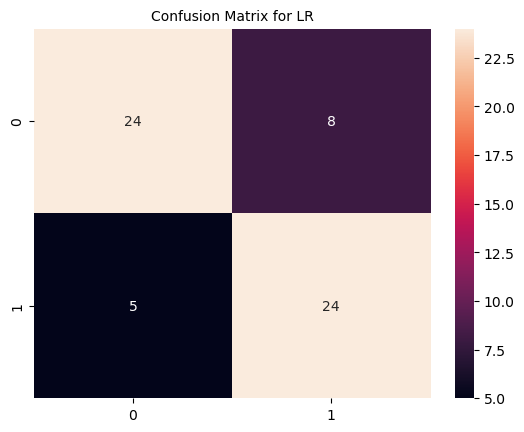

In [53]:
cnfsn_mat=confusion_matrix(y_test,pred_y)
plt.title('Confusion Matrix for LR',fontsize =10)
sns.heatmap(cnfsn_mat,annot=True)

### SVM

In [54]:
svm=svm.SVC()
svm.fit(X_train, y_train)# traing
pred_y_svm=svm.predict(X_test)# predicting
accuracy_score(y_test,pred_y_svm)


0.8032786885245902

<AxesSubplot:title={'center':'Confusion Matrix for SVM'}>

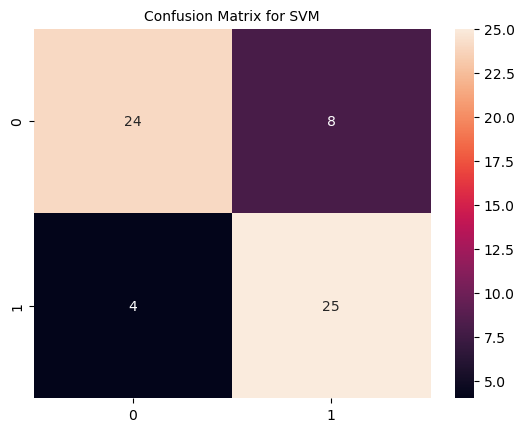

In [55]:
cnfsn_mat=confusion_matrix(y_test,pred_y_svm)
plt.title('Confusion Matrix for SVM',fontsize =10)
sns.heatmap(cnfsn_mat,annot=True)

In [56]:
print(classification_report(y_test,pred_y_svm))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.76      0.86      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



### KNN

In [57]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)# traing
pred_y_knn1=knn.predict(X_test)# predicting
accuracy_score(y_test,pred_y_knn1)

0.7377049180327869

In [58]:
knn=KNeighborsClassifier(n_neighbors=2)# n=2 for k 
knn.fit(X_train, y_train)# traing
pred_y_knn2=knn.predict(X_test)# predicting
accuracy_score(y_test,pred_y_knn2)

0.8032786885245902

In [59]:
knn=KNeighborsClassifier(n_neighbors=3)# n=2 for k 
knn.fit(X_train, y_train)# traing
pred_y_knn3=knn.predict(X_test)# predicting
accuracy_score(y_test,pred_y_knn3)

0.7049180327868853

In [60]:
knn=KNeighborsClassifier(n_neighbors=4)# n=2 for k 
knn.fit(X_train, y_train)# traing
pred_y_knn4=knn.predict(X_test)# predicting
accuracy_score(y_test,pred_y_knn4)

0.7049180327868853

In [61]:
knn=KNeighborsClassifier(n_neighbors=5)# n=2 for k 
knn.fit(X_train, y_train)# traing
pred_y_knn5=knn.predict(X_test)# predicting
accuracy_score(y_test,pred_y_knn5)

0.7377049180327869

<AxesSubplot:title={'center':'Confusion Matrix for KNN -3'}>

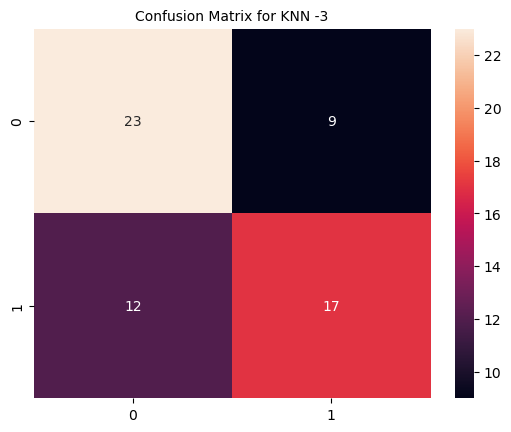

In [180]:
cnfsn_mat=confusion_matrix(y_test,pred_y_knn2)
plt.title('Confusion Matrix for KNN -3',fontsize =10)
sns.heatmap(cnfsn_mat,annot=True)

In [181]:
print(classification_report(y_test,pred_y_knn2))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69        32
           1       0.65      0.59      0.62        29

    accuracy                           0.66        61
   macro avg       0.66      0.65      0.65        61
weighted avg       0.66      0.66      0.65        61



## Non-linear Algorithms

In [64]:
#again reading the same data
df=pd.read_csv("heart.csv")

In [65]:
df.head()

Age  Sex  CP  Trestbps  Chol  Fbs  Restecg  Thalach  Exang  Oldpeak  Slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   Ca  Thal  Predicted_Atrb  
0   2     3               0  
1   0     3               0  
2   0     3               0  
3   1     3               0  
4   3     2               0

In [66]:
df=df.drop_duplicates()

In [67]:
df.shape

(302, 14)

In [68]:
X=df.drop('Predicted_Atrb',axis=1)
y=df['Predicted_Atrb']

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Decision Tree Classification alogrithm

In [70]:
cdt=DecisionTreeClassifier()

In [71]:
cdt.fit(X_train,y_train)

DecisionTreeClassifier()

In [72]:
y_pred_cdt=cdt.predict(X_test)

In [73]:
#accuracy
accuracy_score(y_test,y_pred_cdt)

0.7540983606557377

<AxesSubplot:title={'center':'Confusion Matrix for Classification Decison Tree'}>

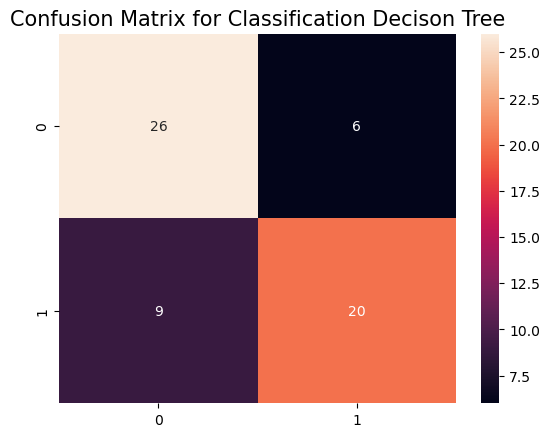

In [74]:
cnfsn_mat=confusion_matrix(y_test,y_pred_cdt)
plt.title('Confusion Matrix for Classification Decison Tree',fontsize =15)
sns.heatmap(cnfsn_mat,annot=True)

In [75]:
print(classification_report(y_test,y_pred_cdt))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78        32
           1       0.77      0.69      0.73        29

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



## Random Forest Classifier

In [76]:
rfc=RandomForestClassifier()

In [77]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [78]:
y_pred_rfc=rfc.predict(X_test)

In [79]:
accuracy_score(y_test,y_pred_rfc)

0.819672131147541

<AxesSubplot:title={'center':'Confusion Matrix for Random Forest Classification '}>

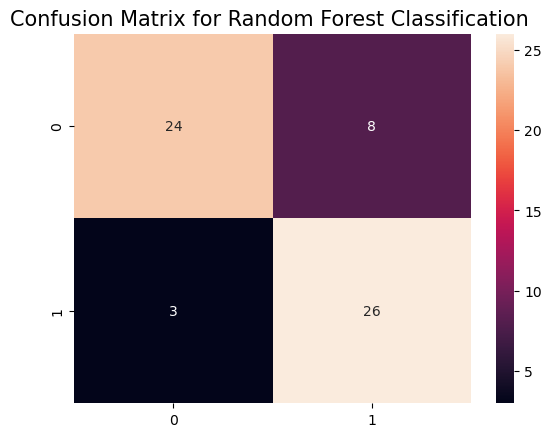

In [80]:
cnfsn_mat=confusion_matrix(y_test,y_pred_rfc)
plt.title('Confusion Matrix for Random Forest Classification ',fontsize =15)
sns.heatmap(cnfsn_mat,annot=True)

In [81]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



### Gradient Boosting Classifier

In [82]:
gbc=GradientBoostingClassifier()

In [83]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [84]:
y_pred_gbc=gbc.predict(X_test)

In [85]:
accuracy_score(y_test,y_pred_gbc)

0.8032786885245902

<AxesSubplot:title={'center':'Confusion Matrix for Gradient Boosting Classification '}>

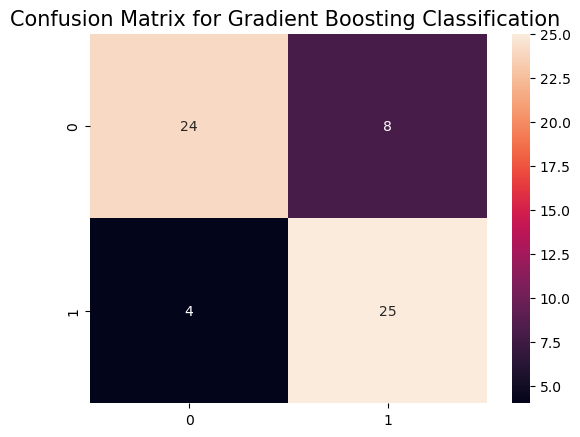

In [86]:
cnfsn_mat=confusion_matrix(y_test,y_pred_gbc)
plt.title('Confusion Matrix for Gradient Boosting Classification ',fontsize =15)
sns.heatmap(cnfsn_mat,annot=True)

In [87]:
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.76      0.86      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



### visualization of the Prediction

In [182]:
fd=pd.DataFrame({'Diffrent_ML_model':['LR','SVM','KNN','CLS_DT','RF','GBC'],
                 'Accuracy':[81.95,80.32,80.32,75.40,81.96,80.32],'Precision':['79','81','66','76','83','81'],'Recall':['79','80','66','75','82','80']})

In [183]:
fd

Diffrent_ML_model  Accuracy Precision Recall
0                LR     81.95        79     79
1               SVM     80.32        81     80
2               KNN     80.32        66     66
3            CLS_DT     75.40        76     75
4                RF     81.96        83     82
5               GBC     80.32        81     80

<AxesSubplot:xlabel='Diffrent_ML_model', ylabel='Accuracy'>

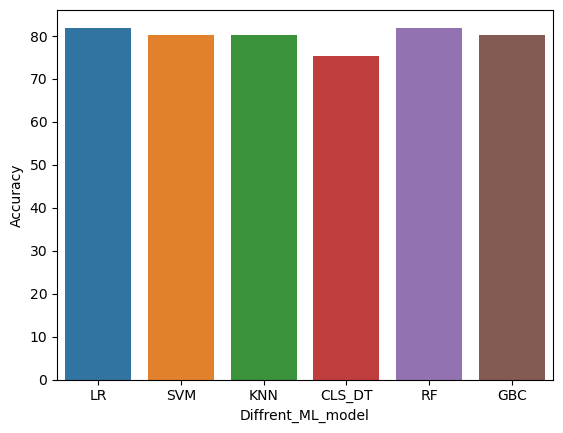

In [184]:
sns.barplot(fd['Diffrent_ML_model'],fd['Accuracy'])

<h2> Hypotheses 2</h2>
<h3>  Resting blood pressure and Cholesterol levels are negatively co-related so it will have low accuracy.</h3>

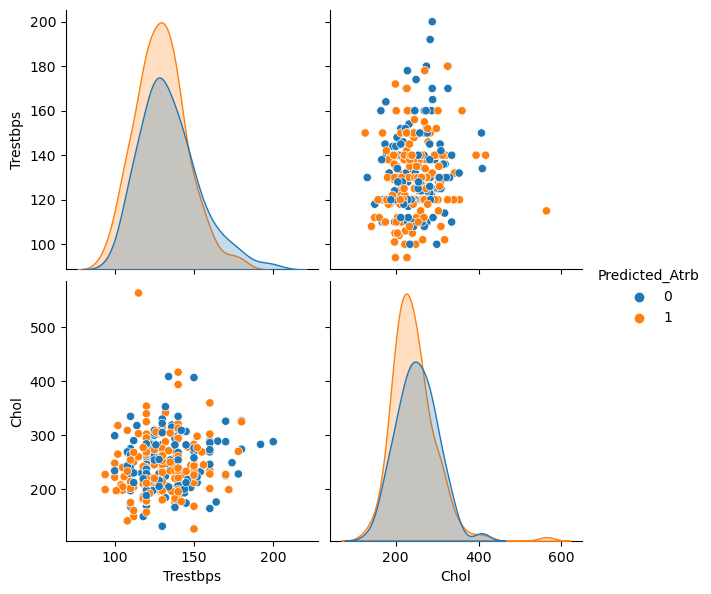

In [91]:
#Visualisation
sns.pairplot(df, vars=['Trestbps', 'Chol'], hue='Predicted_Atrb', height=3)

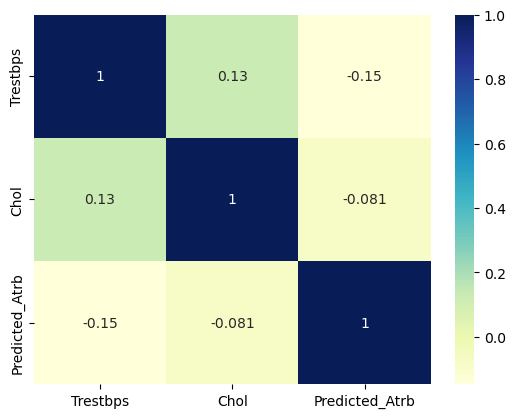

In [92]:
corr_matrix = df[['Trestbps', 'Chol','Predicted_Atrb']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

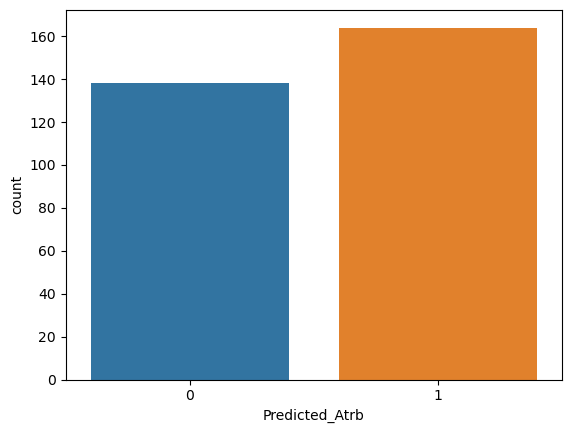

In [93]:
#we can clearly see the data is balance
sns.countplot('Predicted_Atrb', data=df)
plt.show()

In [94]:
categ_col

['CP', 'Fbs', 'Restecg', 'Exang', 'Slope', 'Ca', 'Thal']

In [95]:
cnt_val

['Age', 'Trestbps', 'Chol', 'Thalach', 'Oldpeak']

In [96]:
df.head()

Age  Sex  CP  Trestbps  Chol  Fbs  Restecg  Thalach  Exang  Oldpeak  Slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   Ca  Thal  Predicted_Atrb  
0   2     3               0  
1   0     3               0  
2   0     3               0  
3   1     3               0  
4   3     2               0

In [97]:
st=StandardScaler()
df[cnt_val]=st.fit_transform(df[cnt_val])

In [98]:
df.head() # data is scaled

Age  Sex  CP  Trestbps      Chol  Fbs  Restecg   Thalach  Exang  \
0 -0.267966    1   0 -0.376556 -0.667728    0        1  0.806035      0   
1 -0.157260    1   0  0.478910 -0.841918    1        0  0.237495      1   
2  1.724733    1   0  0.764066 -1.403197    0        1 -1.074521      1   
3  0.728383    1   0  0.935159 -0.841918    0        1  0.499898      0   
4  0.839089    0   0  0.364848  0.919336    1        1 -1.905464      0   

    Oldpeak  Slope  Ca  Thal  Predicted_Atrb  
0 -0.037124      2   2     3               0  
1  1.773958      0   0     3               0  
2  1.342748      0   0     3               0  
3 -0.899544      2   1     3               0  
4  0.739054      1   3     2               0

### Spliting data into traning and testing set

In [99]:
X=df.drop(['Age', 'Sex', 'CP',  'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Predicted_Atrb'],axis=1)
y=df['Predicted_Atrb']

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [101]:
print( "X_train row count ->",X_train.shape[0])
print("y_train row count ->",y_train.shape[0])
print("X_test row count ->",X_test.shape[0])

print("y_test row count ->",y_test.shape[0])

X_train row count -> 241
y_train row count -> 241
X_test row count -> 61
y_test row count -> 61


### LR regression

In [102]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [103]:
# prdiction for LR model
pred_y=log_reg.predict(X_test)

In [104]:
accuracy_score(y_test,pred_y)

0.5081967213114754

In [105]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.55      0.34      0.42        32
           1       0.49      0.69      0.57        29

    accuracy                           0.51        61
   macro avg       0.52      0.52      0.50        61
weighted avg       0.52      0.51      0.49        61



<AxesSubplot:title={'center':'Confusion Matrix for LR'}>

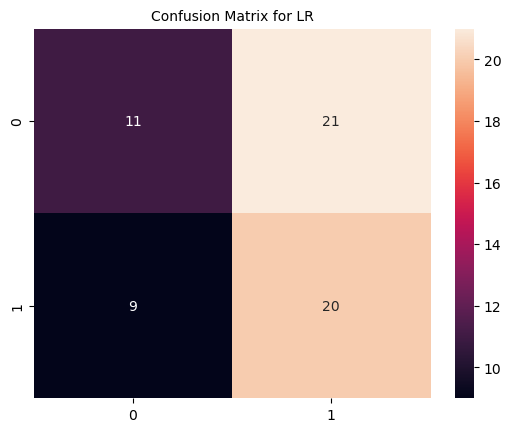

In [106]:
cnfsn_mat=confusion_matrix(y_test,pred_y)
plt.title('Confusion Matrix for LR',fontsize =10)
sns.heatmap(cnfsn_mat,annot=True)

### SVM

In [107]:
from sklearn import svm
svm=svm.SVC()
svm.fit(X_train, y_train)# traing
pred_y_svm=svm.predict(X_test)# predicting
accuracy_score(y_test,pred_y_svm)

0.4918032786885246

<AxesSubplot:title={'center':'Confusion Matrix for SVM'}>

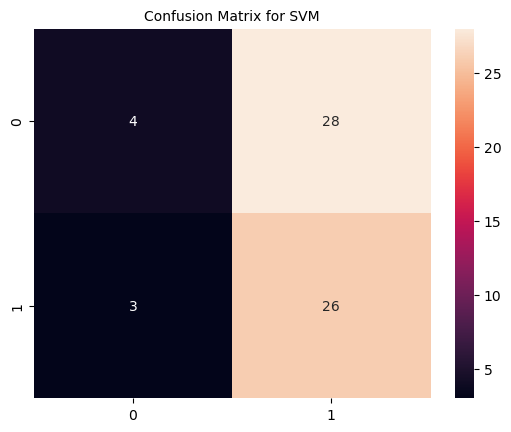

In [108]:
cnfsn_mat=confusion_matrix(y_test,pred_y_svm)
plt.title('Confusion Matrix for SVM',fontsize =10)
sns.heatmap(cnfsn_mat,annot=True)

In [109]:
print(classification_report(y_test,pred_y_svm))

              precision    recall  f1-score   support

           0       0.57      0.12      0.21        32
           1       0.48      0.90      0.63        29

    accuracy                           0.49        61
   macro avg       0.53      0.51      0.42        61
weighted avg       0.53      0.49      0.41        61



### KNN

In [110]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)# traing
pred_y_knn1=knn.predict(X_test)# predicting
accuracy_score(y_test,pred_y_knn1)

0.45901639344262296

In [111]:
knn=KNeighborsClassifier(n_neighbors=2)# n=2 for k 
knn.fit(X_train, y_train)# traing
pred_y_knn2=knn.predict(X_test)# predicting
accuracy_score(y_test,pred_y_knn2)

0.47540983606557374

In [112]:
knn=KNeighborsClassifier(n_neighbors=3)# n=2 for k 
knn.fit(X_train, y_train)# traing
pred_y_knn2=knn.predict(X_test)# predicting
accuracy_score(y_test,pred_y_knn2)

0.4918032786885246

In [113]:
knn=KNeighborsClassifier(n_neighbors=4)# n=2 for k 
knn.fit(X_train, y_train)# traing
pred_y_knn2=knn.predict(X_test)# predicting
accuracy_score(y_test,pred_y_knn2)

0.4098360655737705

In [114]:
knn=KNeighborsClassifier(n_neighbors=5)# n=2 for k 
knn.fit(X_train, y_train)# traing
pred_y_knn2=knn.predict(X_test)# predicting
accuracy_score(y_test,pred_y_knn2)

0.45901639344262296

<AxesSubplot:title={'center':'Confusion Matrix for KNN -3'}>

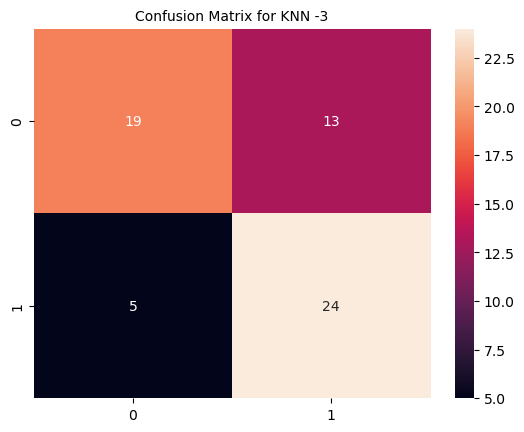

In [115]:
cnfsn_mat=confusion_matrix(y_test,pred_y_knn3)
plt.title('Confusion Matrix for KNN -3',fontsize =10)
sns.heatmap(cnfsn_mat,annot=True)

In [116]:
print(classification_report(y_test,pred_y_knn3))

              precision    recall  f1-score   support

           0       0.79      0.59      0.68        32
           1       0.65      0.83      0.73        29

    accuracy                           0.70        61
   macro avg       0.72      0.71      0.70        61
weighted avg       0.72      0.70      0.70        61



## Non-linear Algorithms

In [117]:
#again reading the same data
df=pd.read_csv("heart.csv")

In [118]:
df.head()

Age  Sex  CP  Trestbps  Chol  Fbs  Restecg  Thalach  Exang  Oldpeak  Slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   Ca  Thal  Predicted_Atrb  
0   2     3               0  
1   0     3               0  
2   0     3               0  
3   1     3               0  
4   3     2               0

In [119]:
df=df.drop_duplicates()

In [120]:
df.shape

(302, 14)

In [121]:
X=df.drop(['Age', 'Sex', 'CP',  'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Predicted_Atrb'],axis=1)
y=df['Predicted_Atrb']

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Decision Tree Classification alogrithm

In [123]:
cdt=DecisionTreeClassifier()
cdt.fit(X_train,y_train)

DecisionTreeClassifier()

In [124]:
y_pred_cdt=cdt.predict(X_test)
#accuracy
accuracy_score(y_test,y_pred_cdt)

0.47540983606557374

<AxesSubplot:title={'center':'Confusion Matrix for Classification Decison Tree'}>

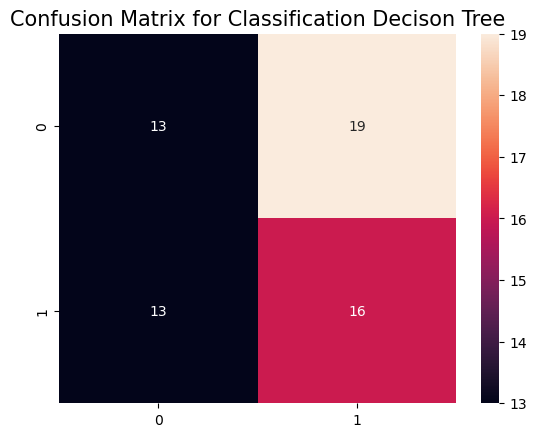

In [125]:
cnfsn_mat=confusion_matrix(y_test,y_pred_cdt)
plt.title('Confusion Matrix for Classification Decison Tree',fontsize =15)
sns.heatmap(cnfsn_mat,annot=True)

In [126]:
print(classification_report(y_test,y_pred_cdt))

              precision    recall  f1-score   support

           0       0.50      0.41      0.45        32
           1       0.46      0.55      0.50        29

    accuracy                           0.48        61
   macro avg       0.48      0.48      0.47        61
weighted avg       0.48      0.48      0.47        61



### Random Forest Classifier

In [127]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [128]:
y_pred_rfc=rfc.predict(X_test)
accuracy_score(y_test,y_pred_rfc)

0.5081967213114754

<AxesSubplot:title={'center':'Confusion Matrix for Random Forest Classification '}>

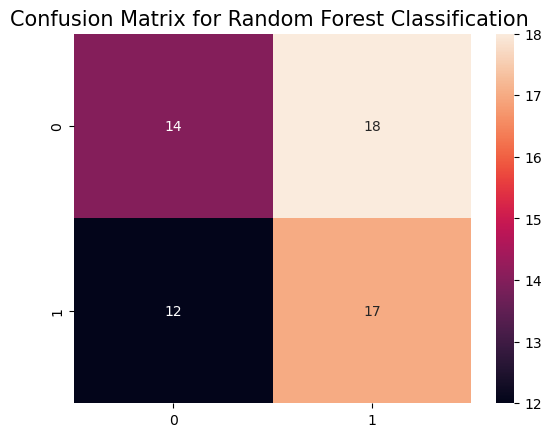

In [129]:
cnfsn_mat=confusion_matrix(y_test,y_pred_rfc)
plt.title('Confusion Matrix for Random Forest Classification ',fontsize =15)
sns.heatmap(cnfsn_mat,annot=True)

In [130]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.54      0.44      0.48        32
           1       0.49      0.59      0.53        29

    accuracy                           0.51        61
   macro avg       0.51      0.51      0.51        61
weighted avg       0.51      0.51      0.51        61



### Gradient Boosting Classifier

In [131]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [132]:
y_pred_gbc=gbc.predict(X_test)
accuracy_score(y_test,y_pred_gbc)

0.5081967213114754

<AxesSubplot:title={'center':'Confusion Matrix for Gradient Boosting Classification '}>

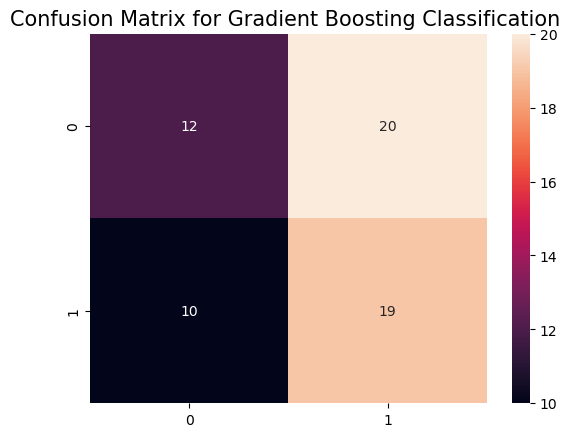

In [133]:
cnfsn_mat=confusion_matrix(y_test,y_pred_gbc)
plt.title('Confusion Matrix for Gradient Boosting Classification ',fontsize =15)
sns.heatmap(cnfsn_mat,annot=True)

In [134]:
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       0.55      0.38      0.44        32
           1       0.49      0.66      0.56        29

    accuracy                           0.51        61
   macro avg       0.52      0.52      0.50        61
weighted avg       0.52      0.51      0.50        61



### visualization of the Prediction for Hypothesis-2

In [185]:
fd=pd.DataFrame({'Diffrent_ML_model':['LR','SVM','KNN','CLS_DT','RF','GBC'],
                 'Accuracy':[50.81,49.81,49.81,47.54,52.45,50.81],'Precision':['52','52','72','48','51','52'],'Recall':['51','49','70','75','51','51']})

In [186]:
fd

Diffrent_ML_model  Accuracy Precision Recall
0                LR     50.81        52     51
1               SVM     49.81        52     49
2               KNN     49.81        72     70
3            CLS_DT     47.54        48     75
4                RF     52.45        51     51
5               GBC     50.81        52     51

<AxesSubplot:title={'center':'Accuracy of diffrent models for Hypothesis 2 '}, xlabel='Diffrent_ML_model', ylabel='Accuracy'>

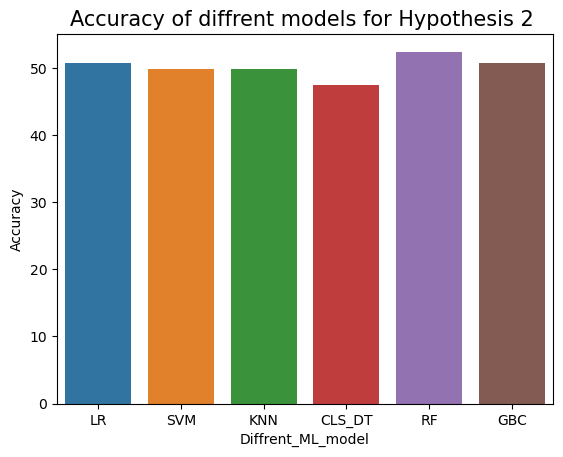

In [136]:
plt.title('Accuracy of diffrent models for Hypothesis 2 ',fontsize =15)
sns.barplot(fd['Diffrent_ML_model'],fd['Accuracy'])

<h2> Hypotheses 3</h2>
<h3>  CP,ReseECG, Thalach and Slope levels are highly co-related therefore its accuracy for different model will be high.</h3>

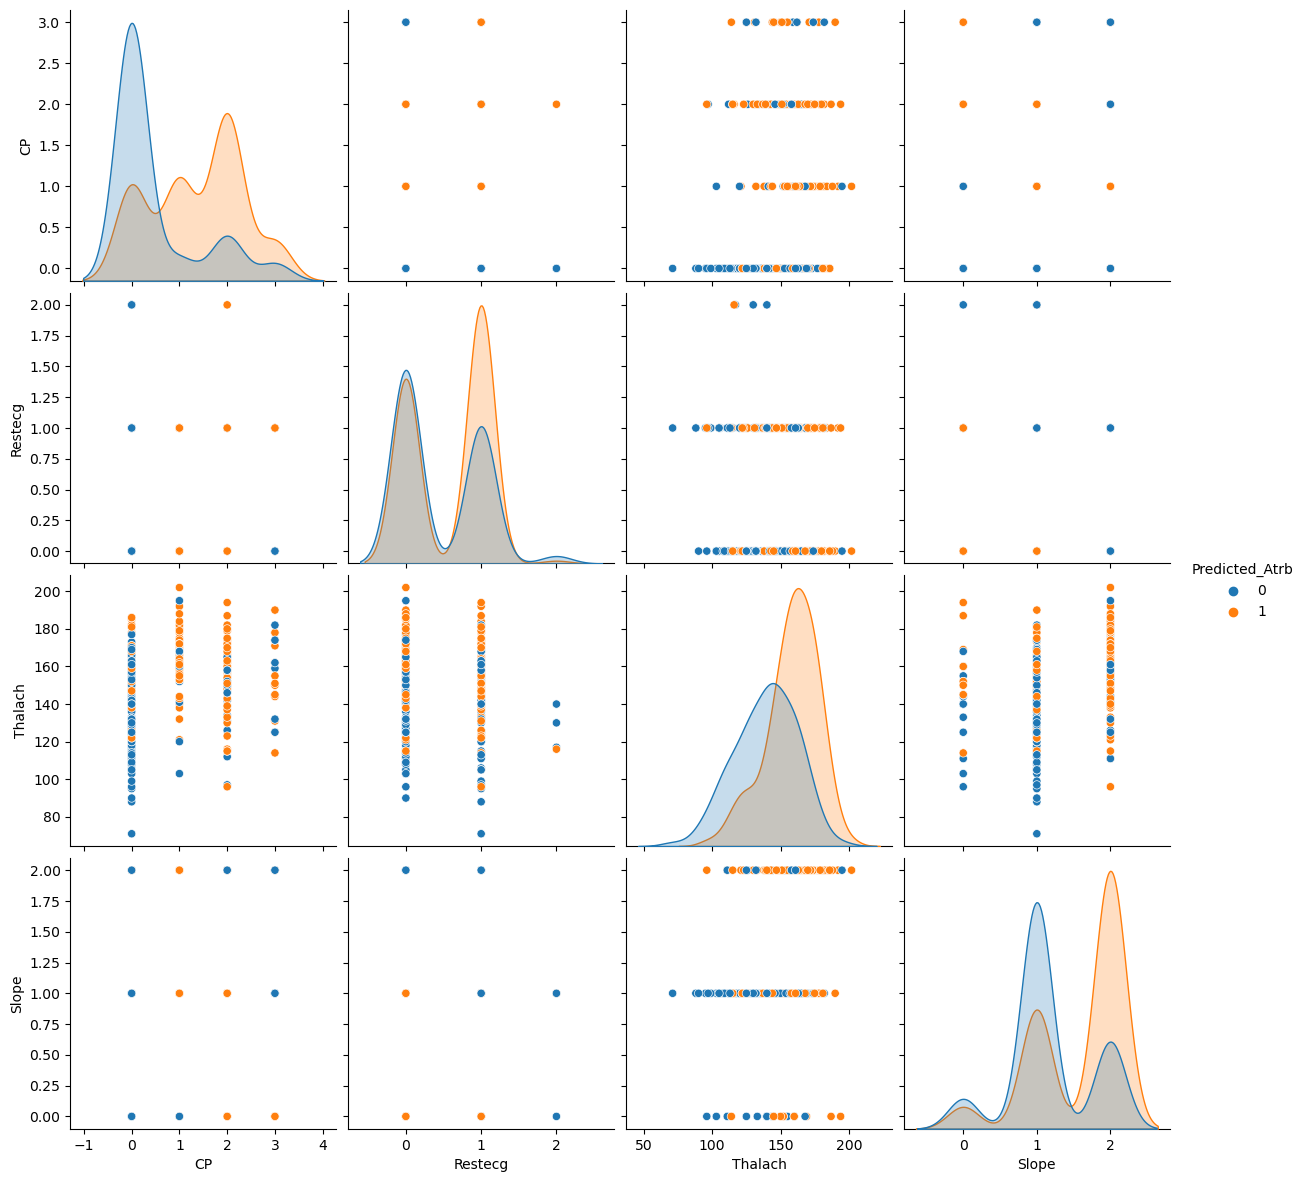

In [137]:
sns.pairplot(df, vars=['CP','Restecg', 'Thalach','Slope'], hue='Predicted_Atrb', height=3)

In [138]:
corr_matrix = df[['CP','Restecg', 'Thalach','Slope','Predicted_Atrb']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

In [139]:
df.head()

Age  Sex  CP  Trestbps  Chol  Fbs  Restecg  Thalach  Exang  Oldpeak  Slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   Ca  Thal  Predicted_Atrb  
0   2     3               0  
1   0     3               0  
2   0     3               0  
3   1     3               0  
4   3     2               0

In [140]:

df=pd.get_dummies(df,columns=categ_col,drop_first=True)

<h3>Scaling of the feature</h3>

In [141]:
st=StandardScaler()
df[cnt_val]=st.fit_transform(df[cnt_val])

In [142]:
df.head()# data scaled

Age  Sex  Trestbps      Chol   Thalach   Oldpeak  Predicted_Atrb  \
0 -0.267966    1 -0.376556 -0.667728  0.806035 -0.037124               0   
1 -0.157260    1  0.478910 -0.841918  0.237495  1.773958               0   
2  1.724733    1  0.764066 -1.403197 -1.074521  1.342748               0   
3  0.728383    1  0.935159 -0.841918  0.499898 -0.899544               0   
4  0.839089    0  0.364848  0.919336 -1.905464  0.739054               0   

   CP_1  CP_2  CP_3  ...  Exang_1  Slope_1  Slope_2  Ca_1  Ca_2  Ca_3  Ca_4  \
0     0     0     0  ...        0        0        1     0     1     0     0   
1     0     0     0  ...        1        0        0     0     0     0     0   
2     0     0     0  ...        1        0        0     0     0     0     0   
3     0     0     0  ...        0        0        1     1     0     0     0   
4     0     0     0  ...        0        1        0     0     0     1     0   

   Thal_1  Thal_2  Thal_3  
0       0       0       1  
1       0       0       1  
2       0       0       1  
3       0       0       1  
4       0       1       0  

[5 rows x 23 columns]

In [143]:
X=df.drop(['Predicted_Atrb','Age','Sex','Trestbps','Chol',
          'Oldpeak','Ca_1','Ca_2','Ca_3','Ca_4','Thal_1','Thal_2','Thal_3','Exang_1','Fbs_1'],axis=1)
y=df['Predicted_Atrb']

### Spliting data into traning and testing set

In [144]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [145]:
print( "X_train row count ->",X_train.shape[0])
print("y_train row count ->",y_train.shape[0])
print("X_test row count ->",X_test.shape[0])

print("y_test row count ->",y_test.shape[0])

X_train row count -> 241
y_train row count -> 241
X_test row count -> 61
y_test row count -> 61


### LR regression

In [146]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [147]:
# prdiction for LR model
pred_y=log_reg.predict(X_test)

In [148]:
accuracy_score(y_test,pred_y)

0.6885245901639344

In [149]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69        32
           1       0.66      0.72      0.69        29

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



<AxesSubplot:title={'center':'Confusion Matrix for LR'}>

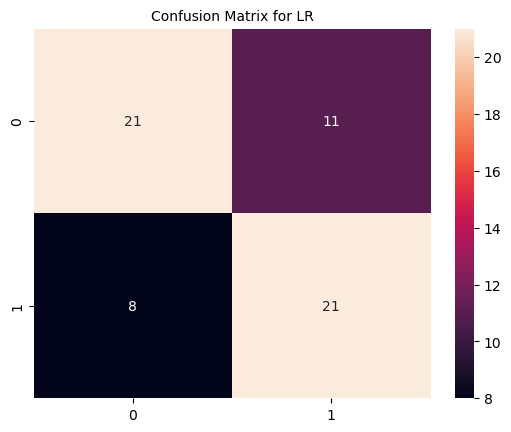

In [150]:
cnfsn_mat=confusion_matrix(y_test,pred_y)
plt.title('Confusion Matrix for LR',fontsize =10)
sns.heatmap(cnfsn_mat,annot=True)

### SVM

In [151]:
from sklearn import svm
svm=svm.SVC()
svm.fit(X_train, y_train)# traing
pred_y_svm=svm.predict(X_test)# predicting
accuracy_score(y_test,pred_y_svm)

0.7213114754098361

In [152]:
cnfsn_mat=confusion_matrix(y_test,pred_y_svm)
plt.title('Confusion Matrix for SVM',fontsize =10)
sns.heatmap(cnfsn_mat,annot=True)

<AxesSubplot:title={'center':'Confusion Matrix for SVM'}>

In [153]:
print(classification_report(y_test,pred_y_svm))

              precision    recall  f1-score   support

           0       0.78      0.66      0.71        32
           1       0.68      0.79      0.73        29

    accuracy                           0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



### KNN

In [154]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)# traing
pred_y_knn1=knn.predict(X_test)# predicting
accuracy_score(y_test,pred_y_knn1)

0.6557377049180327

In [155]:
knn=KNeighborsClassifier(n_neighbors=2)# n=2 for k 
knn.fit(X_train, y_train)# traing
pred_y_knn2=knn.predict(X_test)# predicting
accuracy_score(y_test,pred_y_knn2)

0.6065573770491803

In [156]:
knn=KNeighborsClassifier(n_neighbors=3)# n=3 for k 
knn.fit(X_train, y_train)# traing
pred_y_knn2=knn.predict(X_test)# predicting
accuracy_score(y_test,pred_y_knn2)

0.7213114754098361

In [157]:
knn=KNeighborsClassifier(n_neighbors=4)# n=4 for k 
knn.fit(X_train, y_train)# traing
pred_y_knn2=knn.predict(X_test)# predicting
accuracy_score(y_test,pred_y_knn2)

0.6065573770491803

In [158]:
knn=KNeighborsClassifier(n_neighbors=5)# n=5 for k 
knn.fit(X_train, y_train)# traing
pred_y_knn2=knn.predict(X_test)# predicting
accuracy_score(y_test,pred_y_knn2)

0.6557377049180327

<AxesSubplot:title={'center':'Confusion Matrix for KNN -3'}>

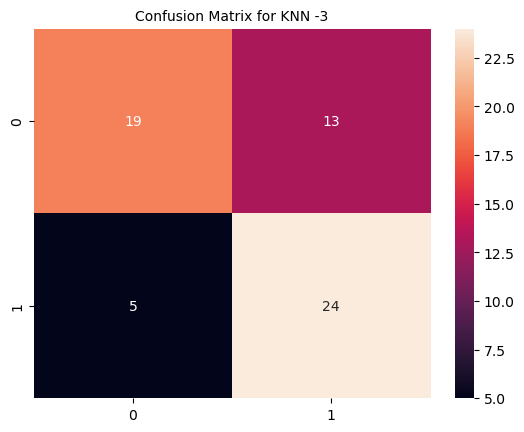

In [159]:
cnfsn_mat=confusion_matrix(y_test,pred_y_knn3)
plt.title('Confusion Matrix for KNN -3',fontsize =10)
sns.heatmap(cnfsn_mat,annot=True)

In [160]:
print(classification_report(y_test,pred_y_knn3))

              precision    recall  f1-score   support

           0       0.79      0.59      0.68        32
           1       0.65      0.83      0.73        29

    accuracy                           0.70        61
   macro avg       0.72      0.71      0.70        61
weighted avg       0.72      0.70      0.70        61



## Non-linear Algorithms

In [161]:
#again reading the same data
df=pd.read_csv("heart.csv")

In [162]:
df=df.drop_duplicates()
df.shape

(302, 14)

In [163]:
# droping the required coloumn in x
X=df.drop(['Predicted_Atrb','Age','Sex','Trestbps','Chol',
          'Oldpeak','Ca','Thal','Exang','Fbs'],axis=1)
y=df['Predicted_Atrb']

In [164]:
X.head()

CP  Restecg  Thalach  Slope
0   0        1      168      2
1   0        0      155      0
2   0        1      125      0
3   0        1      161      2
4   0        1      106      1

In [165]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Decision Tree Classification alogrithm

In [166]:
cdt=DecisionTreeClassifier()
cdt.fit(X_train,y_train)

DecisionTreeClassifier()

In [167]:
y_pred_cdt=cdt.predict(X_test)
#accuracy
accuracy_score(y_test,y_pred_cdt)

0.6885245901639344

<AxesSubplot:title={'center':'Confusion Matrix for Classification Decison Tree'}>

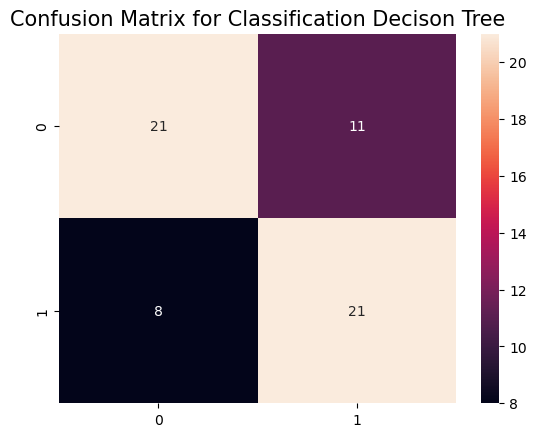

In [168]:
cnfsn_mat=confusion_matrix(y_test,y_pred_cdt)
plt.title('Confusion Matrix for Classification Decison Tree',fontsize =15)
sns.heatmap(cnfsn_mat,annot=True)

In [169]:
print(classification_report(y_test,y_pred_cdt))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69        32
           1       0.66      0.72      0.69        29

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



### Random Forest Classifier

In [170]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [171]:
y_pred_rfc=rfc.predict(X_test)
accuracy_score(y_test,y_pred_rfc)

0.7213114754098361

<AxesSubplot:title={'center':'Confusion Matrix for Random Forest Classification '}>

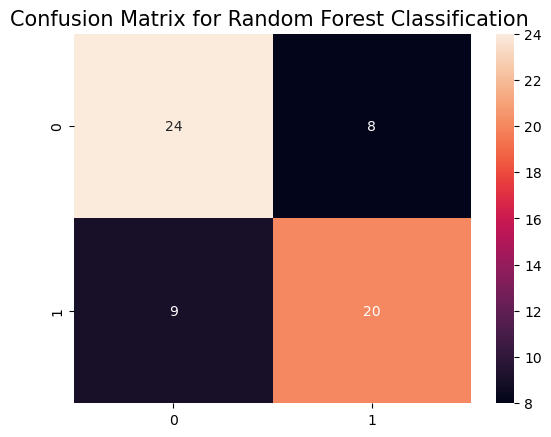

In [172]:
cnfsn_mat=confusion_matrix(y_test,y_pred_rfc)
plt.title('Confusion Matrix for Random Forest Classification ',fontsize =15)
sns.heatmap(cnfsn_mat,annot=True)

In [173]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74        32
           1       0.71      0.69      0.70        29

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



### Gradient Boosting Classifier

In [174]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [175]:
y_pred_gbc=gbc.predict(X_test)
accuracy_score(y_test,y_pred_gbc)

0.7540983606557377

<AxesSubplot:title={'center':'Confusion Matrix for Gradient Boosting Classification '}>

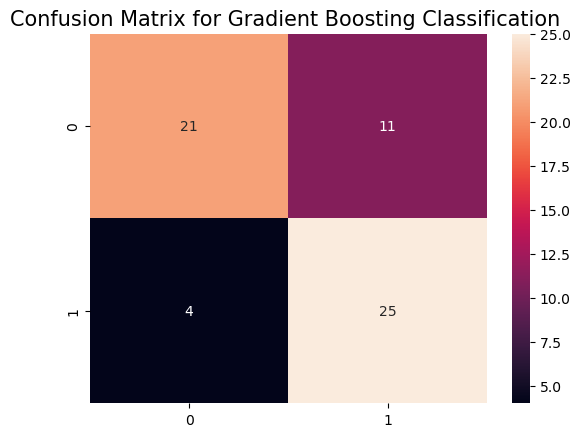

In [176]:
cnfsn_mat=confusion_matrix(y_test,y_pred_gbc)
plt.title('Confusion Matrix for Gradient Boosting Classification ',fontsize =15)
sns.heatmap(cnfsn_mat,annot=True)

In [177]:
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       0.84      0.66      0.74        32
           1       0.69      0.86      0.77        29

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



### visualization of the Prediction for Hypothesis-3

In [187]:
fd=pd.DataFrame({'Diffrent_ML_model':['LR','SVM','KNN','CLS_DT','RF','GBC'],
                 'Accuracy':[68.85,72.13,72.13,68.85,70.49,75.40],'Precision':['69','73','72','69','72','77'],'Recall':['69','72','70','69','72','75']})

In [188]:
fd

Diffrent_ML_model  Accuracy Precision Recall
0                LR     68.85        69     69
1               SVM     72.13        73     72
2               KNN     72.13        72     70
3            CLS_DT     68.85        69     69
4                RF     70.49        72     72
5               GBC     75.40        77     75

<AxesSubplot:title={'center':'Accuracy of diffrent models for Hypothesis 3 '}, xlabel='Diffrent_ML_model', ylabel='Accuracy'>

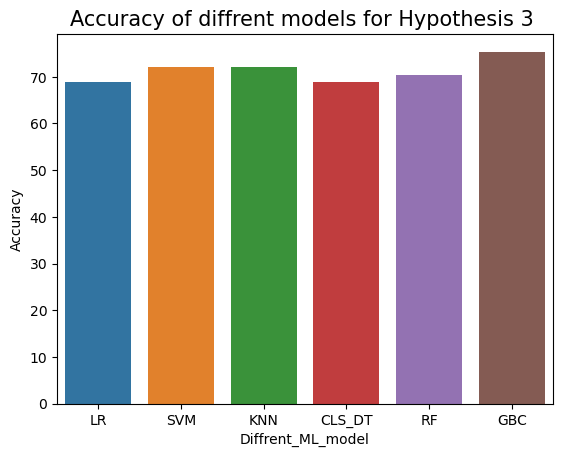

In [179]:
plt.title('Accuracy of diffrent models for Hypothesis 3 ',fontsize =15)
sns.barplot(fd['Diffrent_ML_model'],fd['Accuracy'])